In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
# TODO: add these cuts to kinematic cuts library
reject_kstar_zero_pipkmks = 'kmpip_m < 0.8 || kmpip_m > 1.0'
reject_kstar_plus_pipkmks = 'kspip_m < 0.8 || kspip_m > 1.0'
select_kstar_zero_pipkmks = 'kmpip_m > 0.8 && kmpip_m < 1.0'
select_kstar_plus_pipkmks = 'kspip_m > 0.8 && kspip_m < 1.0'

In [4]:
df_pipkmks_kstar_zero_recon = tools.get_dataframe('pipkmks', 'spring', 'data').Filter('pipkmks_m > 1.35 && pipkmks_m < 1.5').Filter(select_kstar_zero_pipkmks).Filter(reject_kstar_plus_pipkmks)
df_pipkmks_kstar_plus_recon = tools.get_dataframe('pipkmks', 'spring', 'data').Filter('pipkmks_m > 1.35 && pipkmks_m < 1.5').Filter(reject_kstar_zero_pipkmks).Filter(select_kstar_plus_pipkmks)

In [5]:
hist_t_kstar_zero_selected = df_pipkmks_kstar_zero_recon\
    .Histo1D(('hist_t_kstar_zero_selected', '-t(p - p`) [GeV^{2}] for 1.35 < M(KK#pi) < 1.5 GeV with K*{0} Selected', 100, 0.0, 2.0), 'mand_t')

hist_t_kstar_plus_selected = df_pipkmks_kstar_plus_recon\
    .Histo1D(('hist_t_kstar_zero_selected', '-t(p - p`) [GeV^{2}] for 1.35 < M(KK#pi) < 1.5 GeV with K*{0} Selected', 100, 0.0, 2.0), 'mand_t')

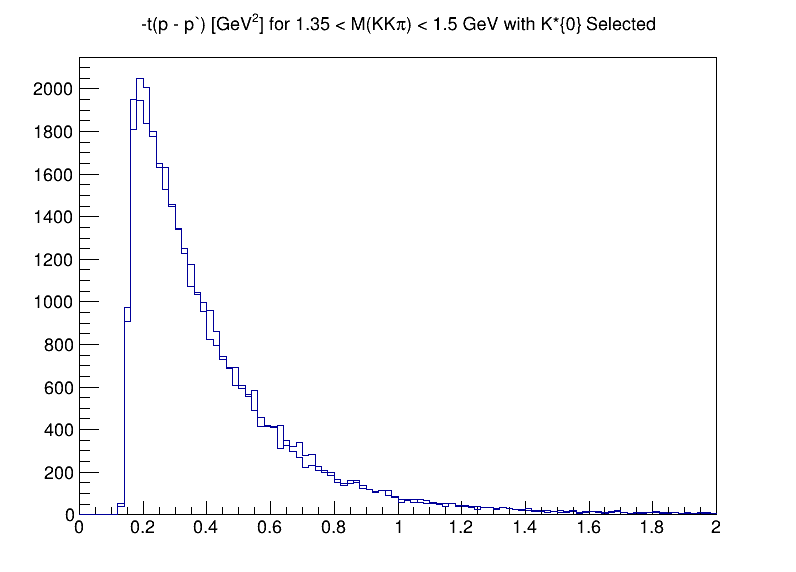

In [6]:
c = ROOT.TCanvas('c', 'c', 800, 600)
hist_t_kstar_zero_selected.Draw()
hist_t_kstar_plus_selected.Draw('same')
c.Draw()

In [16]:
t = ROOT.RooRealVar('t', 't', 0.2, 2.0)
b = ROOT.RooRealVar('b', 'b', -3.0, -4.0, -1.0)
# b.setConstant(True)


In [17]:
data_rdh = ROOT.RooDataHist("data_rdh", "data_rdh", ROOT.RooArgSet(t), hist_t_kstar_zero_selected.GetPtr())
func = ROOT.RooExponential('func', 'func', t, b)
func.fitTo(data_rdh, ROOT.RooFit.SumW2Error(True))


<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b           -3.00000e+00  3.00000e-01   -4.00000e+00 -1.00000e+00
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           1
 **********
 **********
 **   17 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   18 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-8607.1 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIR

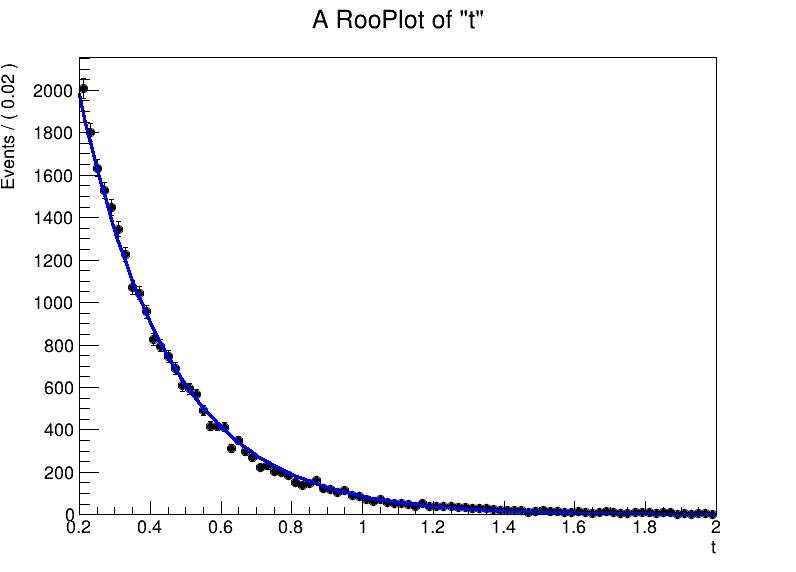

In [18]:
frame = t.frame()
data_rdh.plotOn(frame)
func.plotOn(frame)

frame.Draw()
c.Draw()